In [5]:
!pip install MDAnalysis

Defaulting to user installation because normal site-packages is not writeable


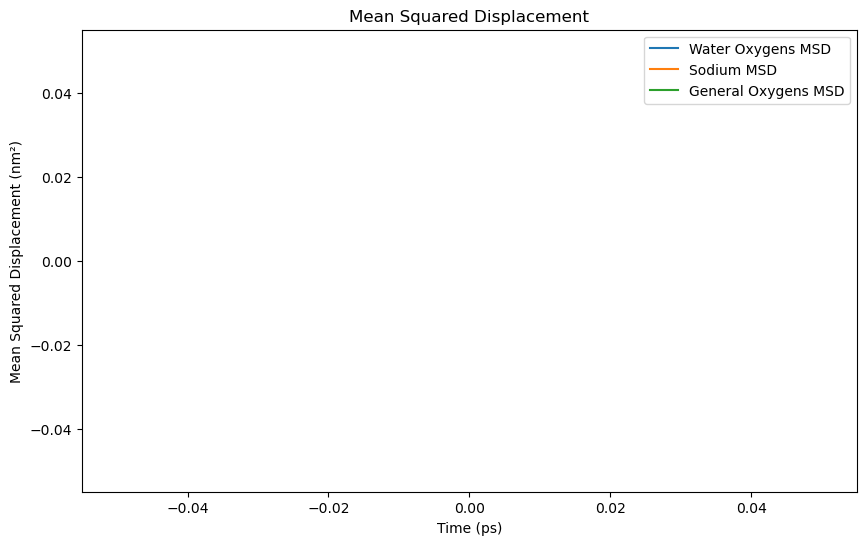

In [5]:
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

# Load your trajectory and topology files
u = mda.Universe('/home/mr6966/comp-lab-class/comp-lab-class-2024-MR/Week4-CharmmGuiSetup/0,1M_NaCl/gromacs/0.1MNaCl_Unwrapped.gro', '/home/mr6966/comp-lab-class/comp-lab-class-2024-MR/Week4-CharmmGuiSetup/0,1M_NaCl/gromacs/0.1MNaCl_Unwrapped.xtc')

# Define the selections
water_oxygens = u.select_atoms('name O and resname SOL')  # Water Oxygens
sodium = u.select_atoms('name Na')  # Sodium ions
oxygen = u.select_atoms('name O')  # General Oxygens

# Define a function to calculate MSD
def compute_msd(selection):
    # Get the number of frames
    n_frames = len(u.trajectory)
    # Get the initial positions
    initial_positions = selection.positions.copy()
    msd = np.zeros(n_frames)
    
    for i, ts in enumerate(u.trajectory):
        # Calculate the squared displacements
        displacement = selection.positions - initial_positions
        msd[i] = np.mean(np.sum(displacement**2, axis=1))

    return msd

# Calculate MSDs
msd_water_oxygens = compute_msd(water_oxygens)
msd_sodium = compute_msd(sodium)
msd_oxygen = compute_msd(oxygen)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(msd_water_oxygens, label='Water Oxygens MSD')
plt.plot(msd_sodium, label='Sodium MSD')
plt.plot(msd_oxygen, label='General Oxygens MSD')
plt.xlabel('Time (ps)')
plt.ylabel('Mean Squared Displacement (nm²)')
plt.legend()
plt.title('Mean Squared Displacement')
plt.show()
